# Exercise - Hadamard matrix multiplication gone wrong!

In this exercise we are going to use what we know to try and find an error in an OpenCL program. We revisit Hadamard multiplication, where the values in matrices **D** and **E** at coordinates (i0,i1) are multiplied together to set the value at coordinates (i0,i1) in matrix **F**.

<figure style="margin-left:auto; margin-right:auto; width:80%;">
    <img style="vertical-align:middle" src="../images/elementwise_multiplication.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Elementwise multiplication of matrices D and E to get F.</figcaption>
</figure>

The source code is located in [mat_elementwise_buggy.cpp](mat_elementwise_buggy.cpp) and the kernel is in [kernels_elementwise.c](kernels_elementwise.c). Matrices **D** and **E** are read in from disk and matrix **F** is produced as the output. Your fellow colleague put this code together but they just can't seem to work out what went wrong!

## Constructing the inputs and solution

As before, we construct input matrices and call them **D** and **E**.

In [3]:
import numpy as np

from matplotlib import pyplot as plt

%matplotlib widget

# Matrices D, E, F are of size (NROWS_D, NCOLS_D)
NROWS_F = 520
NCOLS_F = 1032

# Data type
dtype = np.float32

# Make up the arrays A, B, and C
D = np.random.random(size = (NROWS_F, NCOLS_F)).astype(dtype)
E = np.random.random(size = (NROWS_F, NCOLS_F)).astype(dtype)

# Make up the answer using Hadamard multiplication
F = D*E

# Write out the arrays as binary files
D.tofile("array_D.dat")
E.tofile("array_E.dat")

## Run the code

In [4]:
!make; ./mat_elementwise_buggy.exe

make: Nothing to be done for 'all'.
	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 135049 MB
	    max buffer size: 33762 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864


## Check the output

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
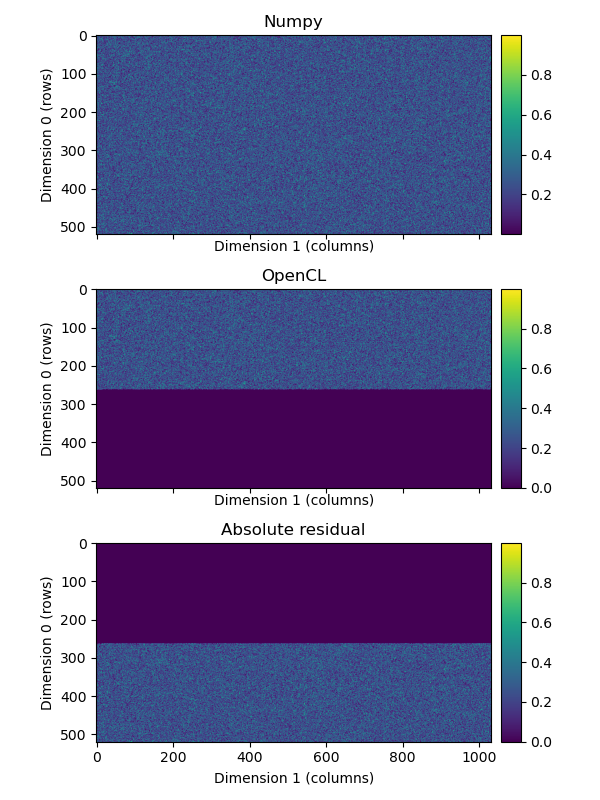

In [5]:
# Import axes machinery
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Read in the output from OpenCL
F_ocl = np.fromfile("array_F.dat", dtype=dtype).reshape((NROWS_F, NCOLS_F))

# Make plots
fig, axes = plt.subplots(3, 1, figsize=(6,8), sharex=True, sharey=True)

# Data to plot
data = [F, F_ocl, np.abs(F-F_ocl)]

# Labels to plot
labels = ["Numpy", "OpenCL", "Absolute residual"]

for n, value in enumerate(data):
    # Plot the graph
    ax = axes[n]
    im = ax.imshow(value)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # Set labels on things
    ax.set_xlabel("Dimension 1 (columns)")
    ax.set_ylabel("Dimension 0 (rows)")
    ax.set_title(labels[n])

    # Put a color bar on the plot
    plt.colorbar(mappable=im, cax=cax)

fig.tight_layout()
plt.show()

## Tasks

Your task is to try and find the error using any of the techniques found in the lesson.